In [1]:
from scipy.linalg import eigvals
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import root
# Parameters
mu = 0.01215  # Earth-Moon system

# Effective potential derivatives
def dU_dx(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return x - (1 - mu)*(x + mu)/r1**3 - mu*(x - 1 + mu)/r2**3

def dU_dy(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return y - (1 - mu)*y/r1**3 - mu*y/r2**3

# System of equations
def equilibrium_system(vars):
    x, y = vars
    return [dU_dx(x, y, mu), dU_dy(x, y, mu)]

# Initial guesses for Lagrange points (adjust if necessary)
initial_guesses = [
    [0.5, 0],  # L1
    [1.5, 0],  # L2
    [-1, 0],   # L3
    [0.5, np.sqrt(3)/2],  # L4
    [0.5, -np.sqrt(3)/2]  # L5
]


# Solve for equilibrium points
equilibrium_points = []
for guess in initial_guesses:
    sol = root(equilibrium_system, guess)
    if sol.success:
        equilibrium_points.append(sol.x)

print("Equilibrium Points:", equilibrium_points)


Equilibrium Points: [array([0.83691801, 0.        ]), array([1.15567991, 0.        ]), array([-1.0050624,  0.       ]), array([0.48785  , 0.8660254]), array([ 0.48785  , -0.8660254])]


In [4]:


# Jacobian matrix
def jacobian(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    d2U_dx2 = 1 - (1 - mu)/r1**3 * (1 - 3*(x + mu)**2/r1**2) - mu/r2**3 * (1 - 3*(x - 1 + mu)**2/r2**2)
    d2U_dy2 = 1 - (1 - mu)/r1**3 * (1 - 3*y**2/r1**2) - mu/r2**3 * (1 - 3*y**2/r2**2)
    d2U_dxdy = -3*(1 - mu)*(x + mu)*y/r1**5 - 3*mu*(x - 1 + mu)*y/r2**5
    return np.array([[d2U_dx2, d2U_dxdy],
                     [d2U_dxdy, d2U_dy2]])

# Analyze stability
for x, y in equilibrium_points:
    J = jacobian(x, y, mu)
    eigenvalues = eigvals(J)
    print(f"Equilibrium Point: ({x:.5f}, {y:.5f})")
    print(f"Eigenvalues: {eigenvalues}")
    if all(ev.real < 0 for ev in eigenvalues):
        print("Stable")
    elif any(ev.real > 0 for ev in eigenvalues):
        print("Unstable")
    else:
        print("Neutrally Stable")


Equilibrium Point: (0.83692, 0.00000)
Eigenvalues: [11.2951467 +0.j -4.14757335+0.j]
Unstable
Equilibrium Point: (1.15568, 0.00000)
Eigenvalues: [ 7.38087322+0.j -2.19043661+0.j]
Unstable
Equilibrium Point: (-1.00506, 0.00000)
Eigenvalues: [ 3.02138152+0.j -0.01069076+0.j]
Unstable
Equilibrium Point: (0.48785, 0.86603)
Eigenvalues: [0.02725292+0.j 2.97274708+0.j]
Unstable
Equilibrium Point: (0.48785, -0.86603)
Eigenvalues: [0.02725292+0.j 2.97274708+0.j]
Unstable


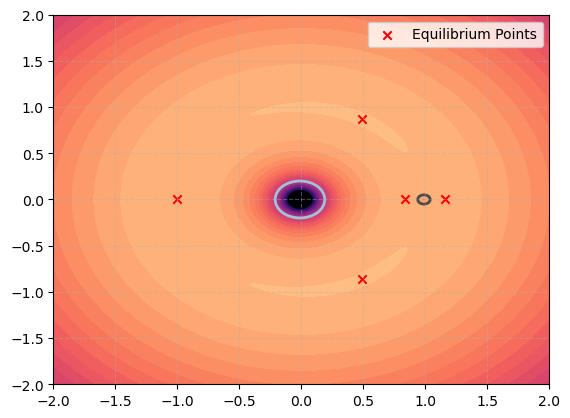

In [46]:
r1 = np.sqrt((x + mu)**2 + y**2)
r2 = np.sqrt((x - 1 + mu)**2 + y**2)
d2U_dx2 = 1 - (1 - mu)/r1**3 * (1 - 3*(x + mu)**2/r1**2) - mu/r2**3 * (1 - 3*(x - 1 + mu)**2/r2**2)
d2U_dy2 = 1 - (1 - mu)/r1**3 * (1 - 3*y**2/r1**2) - mu/r2**3 * (1 - 3*y**2/r2**2)
d2U_dxdy = -3*(1 - mu)*(x + mu)*y/r1**5 - 3*mu*(x - 1 + mu)*y/r2**5

X, Y = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
R1 = np.sqrt((X + mu)**2 + Y**2)
R2 = np.sqrt((X - 1 + mu)**2 + Y**2)
U = - (1 - mu) / R1 - mu / R2 - 0.5 * (X**2 + Y**2)
U_clip = np.clip(U, -200, 0)
plt.contourf(X, Y, U, levels=1000, cmap='magma', vmin=-10, vmax=0)  # Adjust 'magma''
# colorbar = plt.colorbar(label="Effective Potential")
# # colorbar.set_ticks(np.arange(-200, 1, 50))  # Adjust step size for desired spacing
# colorbar.set_ticks([-1, -200])
# colorbar.set_ticklabels([-1, -200])  # Ensure whole numbers
plt.scatter(*zip(*equilibrium_points), color='red', label='Equilibrium Points', marker = 'x')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.4)
# Add Earth as a hollow circle
earth = plt.Circle((-mu, 0), radius=0.2, edgecolor='#A3C1DA', fill=False, linewidth=2, label='Earth')
plt.gca().add_patch(earth)

# Add Moon as a hollow circle
moon = plt.Circle((1 - mu, 0), radius=0.05, edgecolor='#4B4B4B', fill=False, linewidth=2, label='Moon')
plt.gca().add_patch(moon)


plt.show()


In [1]:
import numpy as np
from scipy.optimize import root
from scipy.linalg import eigvals

# Parameters
mu = 0.01215  # Earth-Moon system mass ratio

# Effective potential derivatives
def dU_dx(x, y):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return x - (1 - mu)*(x + mu)/r1**3 - mu*(x - 1 + mu)/r2**3

def dU_dy(x, y):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return y - (1 - mu)*y/r1**3 - mu*y/r2**3

# System of equations for equilibrium points
def equilibrium_system(vars):
    x, y = vars
    return [dU_dx(x, y), dU_dy(x, y)]

# Initial guesses for Lagrange points
initial_guesses = [
    [0.8, 0],     # L1
    [1.2, 0],     # L2
    [-1.0, 0],    # L3
    [0.5, np.sqrt(3)/2],   # L4
    [0.5, -np.sqrt(3)/2],  # L5
]

# Solve for equilibrium points
equilibrium_points = []
for guess in initial_guesses:
    sol = root(equilibrium_system, guess, method='hybr')
    if sol.success:
        equilibrium_points.append(sol.x)
    else:
        print(f"Root finding did not converge for initial guess {guess}")

print("Equilibrium Points:")
for idx, point in enumerate(equilibrium_points, start=1):
    print(f"L{idx}: x = {point[0]:.8f}, y = {point[1]:.8f}")

# Jacobian matrix at equilibrium points
def jacobian(x, y):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)

    d2U_dx2 = 1 - (1 - mu)/r1**3 * (1 - 3*((x + mu)/r1)**2) - mu/r2**3 * (1 - 3*((x - 1 + mu)/r2)**2)
    d2U_dy2 = 1 - (1 - mu)/r1**3 * (1 - 3*(y/r1)**2) - mu/r2**3 * (1 - 3*(y/r2)**2)
    d2U_dxdy = -3*(1 - mu)*(x + mu)*y/r1**5 - 3*mu*(x - 1 + mu)*y/r2**5

    return np.array([[d2U_dx2, d2U_dxdy],
                     [d2U_dxdy, d2U_dy2]])

# Analyze stability
print("\nStability Analysis:")
for idx, (x, y) in enumerate(equilibrium_points, start=1):
    J = jacobian(x, y)
    # Since we are dealing with a 2D system, we need to construct the full 4x4 matrix for the linearized equations of motion
    Omega = np.array([[0, 2], [-2, 0]])
    Zero = np.zeros((2, 2))
    A = np.block([[Zero, np.eye(2)], [J, Omega]])
    eigenvalues = np.linalg.eigvals(A)

    print(f"\nEquilibrium Point L{idx}: (x = {x:.8f}, y = {y:.8f})")
    print(f"Eigenvalues:")
    for ev in eigenvalues:
        print(f"{ev:.8f}")


Equilibrium Points:
L1: x = 0.83691801, y = 0.00000000
L2: x = 1.15567991, y = 0.00000000
L3: x = -1.00506240, y = 0.00000000
L4: x = 0.48785000, y = 0.86602540
L5: x = 0.48785000, y = -0.86602540

Stability Analysis:

Equilibrium Point L1: (x = 0.83691801, y = 0.00000000)
Eigenvalues:
-2.93204868+0.00000000j
2.93204868+0.00000000j
0.00000000+2.33438132j
0.00000000-2.33438132j

Equilibrium Point L2: (x = 1.15567991, y = 0.00000000)
Eigenvalues:
2.15867965+0.00000000j
-2.15867965+0.00000000j
0.00000000+1.86264898j
0.00000000-1.86264898j

Equilibrium Point L3: (x = -1.00506240, y = 0.00000000)
Eigenvalues:
0.00000000+1.01041940j
0.00000000-1.01041940j
-0.17787110+0.00000000j
0.17787110+0.00000000j

Equilibrium Point L4: (x = 0.48785000, y = 0.86602540)
Eigenvalues:
-0.00000000+0.95450331j
-0.00000000-0.95450331j
0.00000000+0.29820031j
0.00000000-0.29820031j

Equilibrium Point L5: (x = 0.48785000, y = -0.86602540)
Eigenvalues:
0.00000000+0.95450331j
0.00000000-0.95450331j
-0.00000000+0.29